<center> <h1> Coffee, Rice and Beef Prices Changes from February 1992 to December 2021 </h1></center>


## Exploring dataset

In [66]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing data

In [67]:
data = pd.read_csv("price.csv")

In [68]:
data.shape

(359, 5)

In [69]:
data

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo
0,1992,Feb,2.52,0.28,1.51
1,1992,Mar,2.45,0.28,1.55
2,1992,Apr,2.38,0.28,1.45
3,1992,May,2.38,0.27,1.34
4,1992,Jun,2.33,0.27,1.30
...,...,...,...,...,...
354,2021,Aug,5.61,0.40,4.77
355,2021,Sep,5.66,0.40,4.97
356,2021,Oct,5.70,0.40,5.31
357,2021,Nov,5.95,0.40,5.71


## Missing data

In [70]:
data.isna().sum().to_frame("Number of missing values").rename_axis("Column Name")

,Number of missing values
Column Name,
Year,0
Month,0
Price_beef_kilo,0
Price_rice_kilo,0
Price_coffee_kilo,0


We have 0 missing data

## Average prices per year

In [71]:
# Convert 'Year' column to datetime type
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Group by Year and calculate the average for each product
avg_prices_per_year = data.groupby(data['Year'].dt.year).mean()

# Display 
avg_prices_per_year

C:\Users\romej\AppData\Local\Temp\ipykernel_22696\77634927.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_prices_per_year = data.groupby(data['Year'].dt.year).mean()


,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo
Year,,,
1992,2.443636,0.268182,1.391818
1993,2.616667,0.235833,1.560000
1994,2.332500,0.266667,3.308333
1995,1.867500,0.321667,3.332500
1996,1.750000,0.340000,2.695000
1997,1.848333,0.302500,4.167500
1998,1.716667,0.305000,2.982500
1999,1.810000,0.248333,2.290000
2000,1.925833,0.202500,1.921667


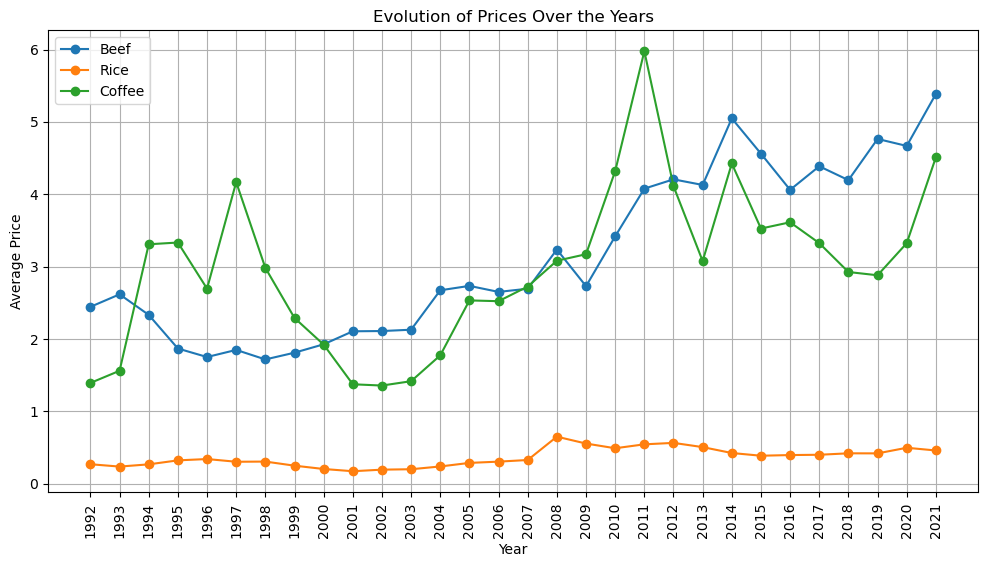

In [72]:
# Plotting the average prices per year
plt.figure(figsize=(12, 6))

plt.plot(avg_prices_per_year.index, avg_prices_per_year['Price_beef_kilo'], label='Beef', marker='o')
plt.plot(avg_prices_per_year.index, avg_prices_per_year['Price_rice_kilo'], label='Rice', marker='o')
plt.plot(avg_prices_per_year.index, avg_prices_per_year['Price_coffee_kilo'], label='Coffee', marker='o')

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Evolution of Prices Over the Years')
plt.legend()
plt.grid(True)

plt.xticks(avg_prices_per_year.index, rotation='vertical')
plt.savefig('avgyear.png')
plt.show()

## Average prices per months

In [73]:
# Convert 'Year' column to datetime type 
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Specify the order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'Month' column to categorical
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

# Group by Month and calculate the average for each product
avg_prices_per_month = data.groupby('Month').mean()

# Display
avg_prices_per_month

C:\Users\romej\AppData\Local\Temp\ipykernel_22696\2701303033.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_prices_per_month = data.groupby('Month').mean()


,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo
Month,,,
Jan,3.075517,0.370690,2.947241
Feb,3.066000,0.369000,2.968667
Mar,3.109333,0.365667,2.990000
Apr,3.132667,0.372000,2.983333
May,3.145667,0.369000,3.042333
Jun,3.121000,0.369000,2.959333
Jul,3.155000,0.366000,2.992000
Aug,3.197000,0.360000,3.008333
Sep,3.181667,0.357667,3.009667


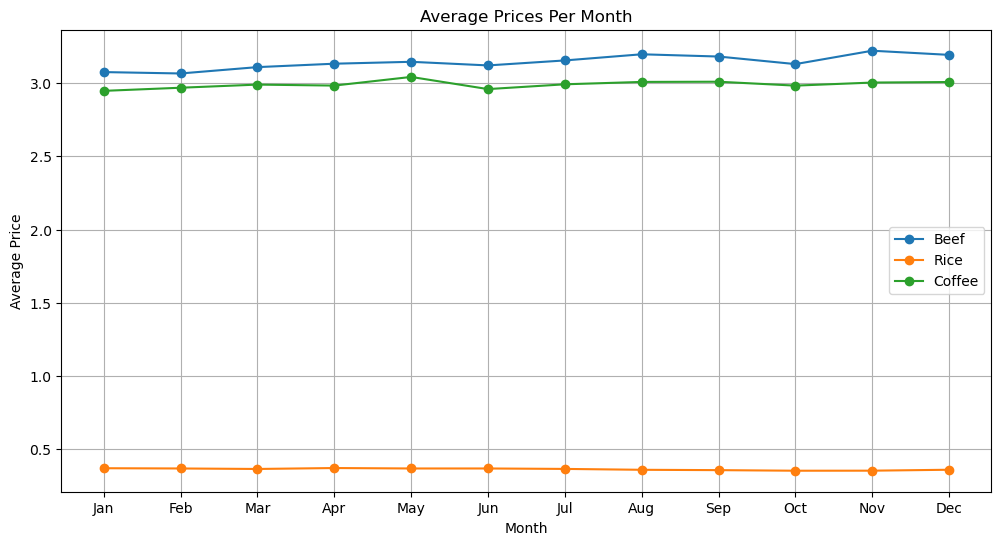

In [74]:
# Plotting the average prices per month
plt.figure(figsize=(12, 6))

plt.plot(avg_prices_per_month.index, avg_prices_per_month['Price_beef_kilo'], label='Beef', marker='o')
plt.plot(avg_prices_per_month.index, avg_prices_per_month['Price_rice_kilo'], label='Rice', marker='o')
plt.plot(avg_prices_per_month.index, avg_prices_per_month['Price_coffee_kilo'], label='Coffee', marker='o')

plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Prices Per Month')
plt.legend()
plt.grid(True)
plt.savefig('avgmonth.png')
plt.show()

### Key Predictive Features Identified by RandomForest Regression Model for Different Prices

In [75]:
# Create the data to make a test with RandomForest Regression Model

# Encoding the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data['Month'] = data['Month'].map({month: i + 1 for i, month in enumerate(month_order)})

# Convert the 'Year' column back to numeric from date format
data['Year'] = pd.to_numeric(data['Year'])
# Create dataframes to test each product prices
df_b= data.copy()
df_r= data.copy()
df_c= data.copy()


#### Beef Price as a target

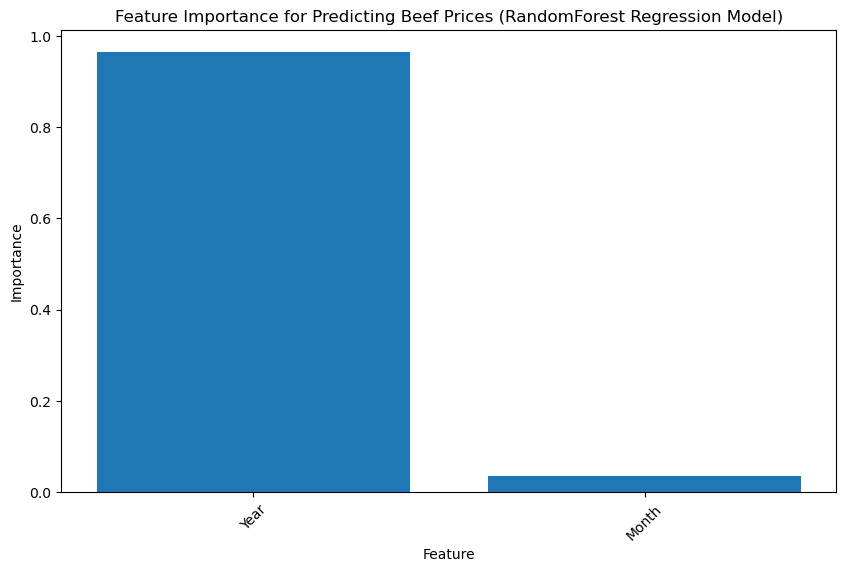

In [76]:

# Create the target
df_b.drop(['Price_rice_kilo', 'Price_coffee_kilo'], axis=1, inplace=True)
y = df_b['Price_beef_kilo']

# Create features
X = df_b.drop('Price_beef_kilo', axis=1)


# Use RandomForest Regression to see the importance of features

from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model
rfr_model = RandomForestRegressor()

# Fit the model
rfr_model.fit(X, y)

# Get feature importances
importances = rfr_model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance for Predicting Beef Prices (RandomForest Regression Model)")
plt.savefig('beefc.png')
plt.show()

#### Rice Price as a target

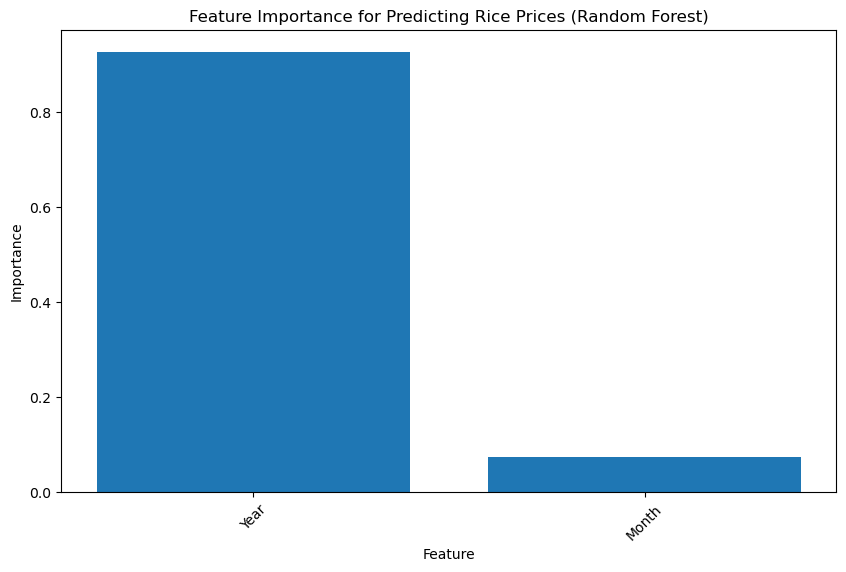

In [77]:
# Create the target
df_r.drop(['Price_coffee_kilo', 'Price_beef_kilo'], axis=1, inplace=True)
y = df_r['Price_rice_kilo']
# Create features
X = df_r.drop('Price_rice_kilo', axis=1)


# Use RandomForest Regression to see the importance of features

from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model
rfr_model = RandomForestRegressor()

# Fit the model
rfr_model.fit(X, y)

# Get feature importances
importances = rfr_model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance for Predicting Rice Prices (Random Forest)")
plt.savefig('ricec.png')
plt.show()

#### Coffee Price as a target

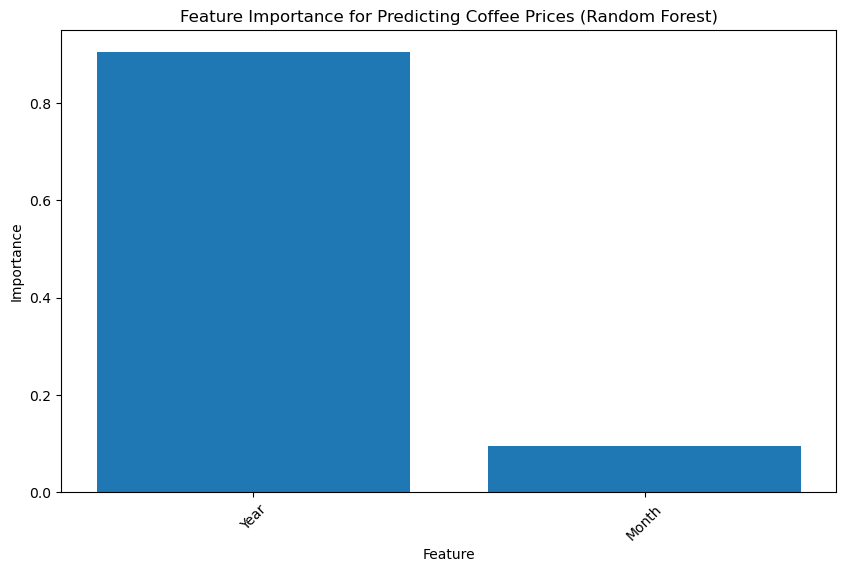

In [78]:

# Create the target
y = df_c['Price_coffee_kilo']
df_c.drop(['Price_rice_kilo', 'Price_beef_kilo'], axis=1, inplace=True)
# Create features
X = df_c.drop('Price_coffee_kilo', axis=1)


# Use RandomForest Regression to see the importance of features

from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model
rfr_model = RandomForestRegressor()

# Fit the model
rfr_model.fit(X, y)

# Get feature importances
importances = rfr_model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance for Predicting Coffee Prices (Random Forest)")
plt.savefig('coffeec.png')
plt.show()